In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
import tensorflow as tf
from tensorflow import keras

In [64]:
from keras.layers import Input, Lambda, Dense, Flatten

Tensorflow backend

In [65]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [66]:
IMAGE_SIZE = [224, 224]

train_path = '/gdrive/My Drive/input/labeled-chest-xray-images/chest_xray/train/'
test_path = '/gdrive/My Drive/input/labeled-chest-xray-images/chest_xray/test/'

In [67]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [68]:
# https://stackoverflow.com/questions/61292890/transfer-learning-only-works-with-trainable-set-to-false
for layer in vgg.layers:
    layer.trainable = False

In [69]:
# https://stackoverflow.com/questions/2186525/how-to-use-glob-to-find-files-recursively
folders = glob('/gdrive/My Drive/input/labeled-chest-xray-images/chest_xray/train/*')
x = Flatten() (vgg.output)

In [70]:
prediction = Dense(len(folders), activation='softmax') (x)
# creating a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view structure of the model
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

compiling model

In [71]:
# https://stackoverflow.com/questions/42081257/why-binary-crossentropy-and-categorical-crossentropy-give-different-performances
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [72]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
# note: must input code received from google for access to the google drive files: Please copy this code, switch to your application and paste it there:
# 4/1AX4XfWgMbu2qOfhAjCXU90DNP_Yx7EFgJsSBJrHiKfPqnwomhdAgQZxkp3o
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


Creating Generators

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.3,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)




# Make sure you provide the same target size as initialied for the image size ("reads the folder name for different classes NORMAL and PNEMONIA")
training_set = train_datagen.flow_from_directory('/gdrive/My Drive/input/labeled-chest-xray-images/chest_xray/train/',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')




test_set = test_datagen.flow_from_directory('/gdrive/My Drive/input/labeled-chest-xray-images/chest_xray/test/',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Building and Fitting Model

In [14]:
r = model.fit_generator(   
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  workers=-1,
)

Epoch 1/5
522/522 [==============================] - 1957s 4s/step - loss: 0.2305 - accuracy: 0.9151 - val_loss: 0.5050 - val_accuracy: 0.8269
Epoch 2/5
522/522 [==============================] - 308s 590ms/step - loss: 0.1575 - accuracy: 0.9469 - val_loss: 0.4396 - val_accuracy: 0.8894
Epoch 3/5
522/522 [==============================] - 307s 587ms/step - loss: 0.1610 - accuracy: 0.9513 - val_loss: 1.0841 - val_accuracy: 0.8013
Epoch 4/5
522/522 [==============================] - 305s 585ms/step - loss: 0.1433 - accuracy: 0.9565 - val_loss: 0.7804 - val_accuracy: 0.8638
Epoch 5/5
522/522 [==============================] - 312s 599ms/step - loss: 0.1680 - accuracy: 0.9553 - val_loss: 0.3912 - val_accuracy: 0.8990


In [15]:
import tensorflow as tf
from keras.models import load_model
# from google.colab import drive
# drive.mount()
# %cd /gdrive
model.save('/gdrive/My Drive/input/chest_xray_version2_5_Epochs.h5')

In [16]:
from keras.models import load_model

In [17]:
from keras.preprocessing import image

In [18]:
from keras.applications.vgg16 import preprocess_input

In [19]:
import numpy as np

In [20]:
# from keras.models import load_model
model=load_model('/gdrive/My Drive/input/chest_xray_version2_5_Epochs.h5')

In [21]:
model.compile(metrics=[tf.keras.metrics.Recall()])

In [22]:
model.evaluate(test_set, return_dict=True, use_multiprocessing=True, workers=-1)

63/63 [==============================] - 26s 413ms/step - loss: 0.0000e+00 - recall: 0.8990


{'loss': 0.0, 'recall': 0.8990384340286255}

In [53]:
#conf_matrix = tf.math.confusion_matrix(labels=test_set,
predictions=model.predict(test_set, workers=-1)
print(predictions[:])
# pred_labels = np.squeeze(np.array(model.predict(test_set) >= 0.5, dtype=np.int))
# pred_labels[:]

[[9.9999392e-01 6.1087921e-06]
 [4.8051965e-03 9.9519473e-01]
 [9.9999571e-01 4.2763654e-06]
 ...
 [1.6997041e-05 9.9998295e-01]
 [4.8646253e-02 9.5135373e-01]
 [8.8715978e-02 9.1128403e-01]]


In [27]:
test_set.classes[:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [54]:
rnd_predictions = [round(pred[0]) for pred in predictions]
np.array(rnd_predictions)[:]

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Results

In [55]:
conf_matrix = tf.math.confusion_matrix(labels=test_set.classes, predictions=np.array(rnd_predictions))
conf_matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[142,  92],
       [231, 159]], dtype=int32)>

In [30]:
img=image.load_img('/gdrive/My Drive/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/person20_virus_51.jpeg',target_size=(224,224))

In [31]:
x=image.img_to_array(img)

In [32]:
x=np.expand_dims(x, axis=0)

In [33]:
img_data=preprocess_input(x)

In [34]:
classes=model.predict(img_data)

In [35]:
# classes
result=int(classes[0][0])

In [36]:
if result==1:
  print("X-Ray results are Normal")
else:
  print("X-Ray results indicate Pneumonia")
  

X-Ray results indicate Pneumonia


In [37]:
result

0

Explanation of Classes - First Column Prediction: result score: 0 = Pnemonia and 1 = Normal,   Second Column Actual x-Ray: 1 = Pneumonia and 0 = Normal

In [38]:
classes

array([[0., 1.]], dtype=float32)

Additional Metrics and Plots

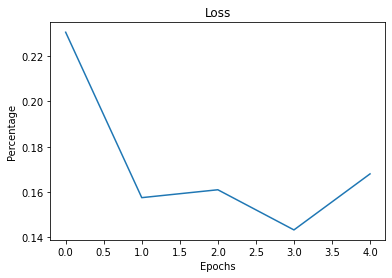

In [47]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Percentage')
plt.plot(r.history['loss'])

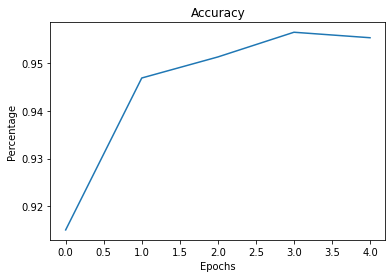

In [48]:
import matplotlib.pyplot as plt
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Percentage')
plt.plot(r.history['accuracy'])

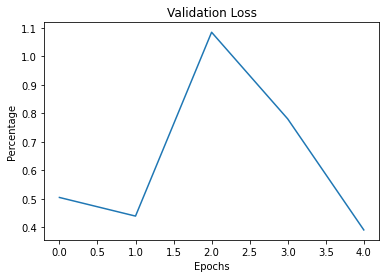

In [49]:
import matplotlib.pyplot as plt
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Percentage')
plt.plot(r.history['val_loss'])

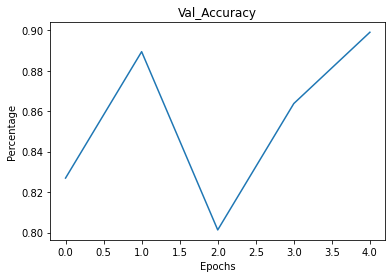

In [50]:
import matplotlib.pyplot as plt
plt.title('Val_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Percentage')
plt.plot(r.history['val_accuracy'])

In [103]:
from sklearn.metrics import confusion_matrix

In [75]:
true_labels = test_set.labels
true_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [102]:
pred_labels = [round(pred[0]) for pred in predictions]
pred_labels = np.array(pred_labels)[:]
pred_labels

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [104]:
cm = confusion_matrix(true_labels, pred_labels)

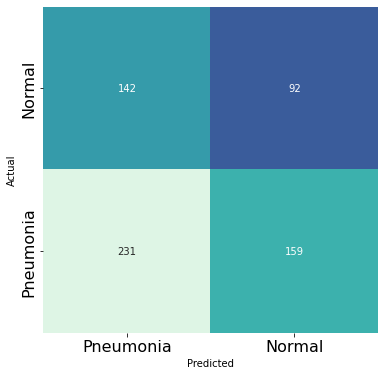

In [124]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='mako', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(np.arange(2) + 0.5, ['Pneumonia', 'Normal'], fontsize=16)
plt.yticks(np.arange(2) + 0.5, ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

In [125]:
results = model.evaluate(test_set, verbose=0)
accuracy = results[1]


In [126]:
tn, fp, fn, tp = cm.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)

In [128]:
print ("Accuracy: {:.2f}".format(accuracy))
print ("Precision: {:.2f}".format(precision))
# print ("Recall: {:.2f}".format(recall)) 

Accuracy: 0.63
Precision: 0.63
